In [2]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [3]:
path = Path('.')
dataframes = {}
columns =  ['dates','subframe_n','subframe_ind','rnti','direction','mcs']
for p in list(path.glob('new_A')):
    for file in tqdm(list(p.glob('*.csv*'))[:1]):
        df = pd.read_csv(file, names = columns)
        with pd.option_context('mode.use_inf_as_null', True):
            df = df.dropna()#fillna(0)#dropna(subset=['subframe_ind', 'rnti', 'direction', 'mcs'], how='all')
        df[['subframe_ind', 'rnti', 'direction', 'mcs']] = df[['subframe_ind', 'rnti', 'direction', 'mcs']].astype(np.int)
        df.dates = pd.to_datetime(df.dates, format='%Y%m%d%H%M%S')
        dataframes[file.parts[-1]]=df#.sort_values('rnti').reset_index(drop = True)

df = pd.concat([dataframes[key] for key in dataframes.keys()])

100%|██████████| 1/1 [00:03<00:00,  3.86s/it]


In [4]:
df = df[(df.rnti > 10)&(df.rnti != 65535)]
df['date_delta'] = (df['dates'] - df['dates'].min())  / np.timedelta64(1,'s')
df = df.drop(columns = 'dates')

In [82]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318299 entries, 0 to 597894
Data columns (total 6 columns):
subframe_n      318299 non-null int64
subframe_ind    318299 non-null int32
rnti            318299 non-null int32
direction       318299 non-null int32
mcs             318299 non-null int32
date_delta      318299 non-null float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 12.1 MB
None
          subframe_n   subframe_ind           rnti      direction  \
count  318299.000000  318299.000000  318299.000000  318299.000000   
mean      533.232561       4.796820   26642.868312       0.451871   
std       306.692495       2.958276   10841.622295       0.497679   
min         0.000000       0.000000      11.000000       0.000000   
25%       271.000000       2.000000   23129.000000       0.000000   
50%       534.000000       5.000000   24173.000000       0.000000   
75%       794.000000       8.000000   26219.000000       1.000000   
max      1120.000000       9.000000   6553

,subframe_n,subframe_ind,rnti,direction,mcs,date_delta
0,28,4,46997,1,20,0.0
1,53,5,32000,1,20,1.0
2,85,3,45928,1,0,1.0
4,27,8,22109,1,4,2.0
5,67,0,7999,1,14,2.0



 mu = 533.23 and sigma = 306.69



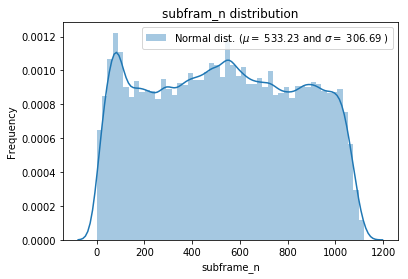

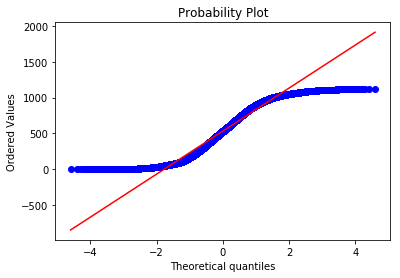

In [19]:
target = 'subframe_n'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('subfram_n distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 4.80 and sigma = 2.96



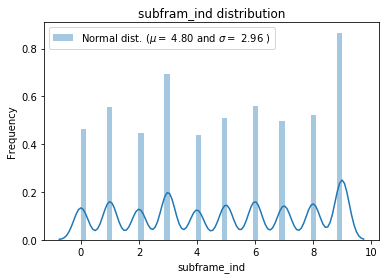

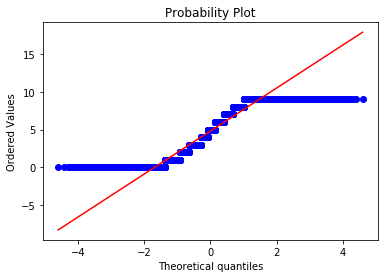

In [20]:
target = 'subframe_ind'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('subfram_ind distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 26642.87 and sigma = 10841.61



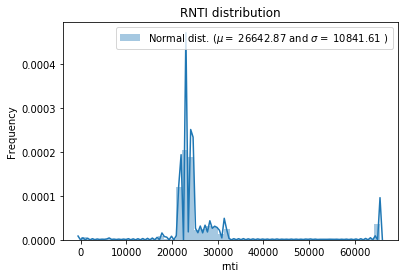

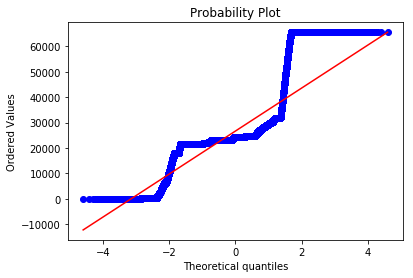

In [21]:
target = 'rnti'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('RNTI distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 11.46 and sigma = 9.52



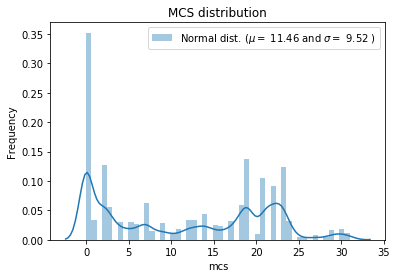

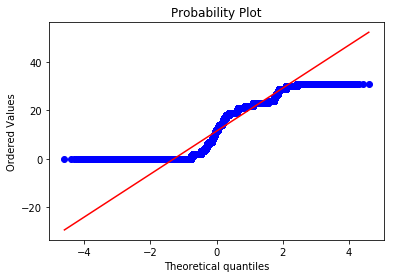

In [22]:
target = 'mcs'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MCS distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 6040.90 and sigma = 1457.88



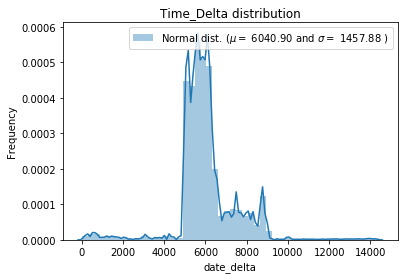

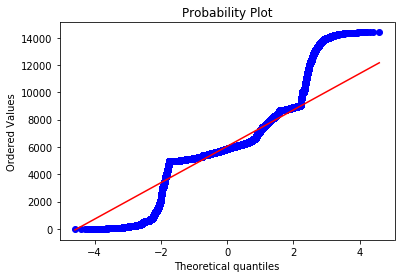

In [23]:
target = 'date_delta'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Time_Delta distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()

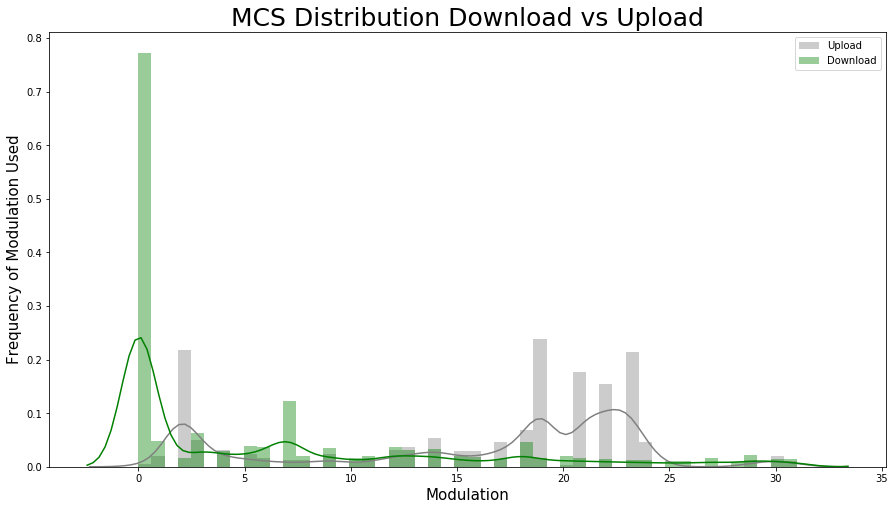

In [26]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'mcs'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'mcs'] , color='g', label='Download')
plt.title('MCS Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Modulation Used", fontsize = 15)
plt.xlabel("Modulation", fontsize = 15)
plt.legend()
plt.show()

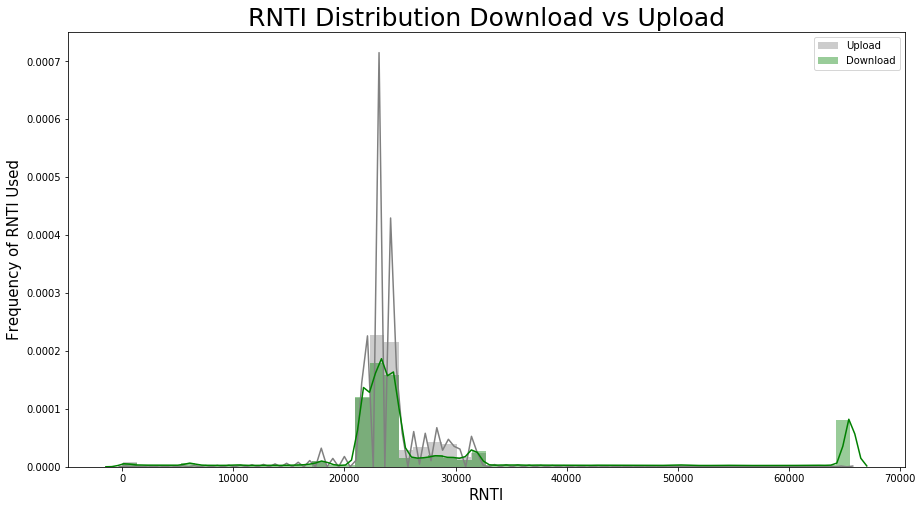

In [27]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'rnti'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'rnti'] , color='g', label='Download')
plt.title('RNTI Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of RNTI Used", fontsize = 15)
plt.xlabel("RNTI", fontsize = 15)
plt.legend()
plt.show()

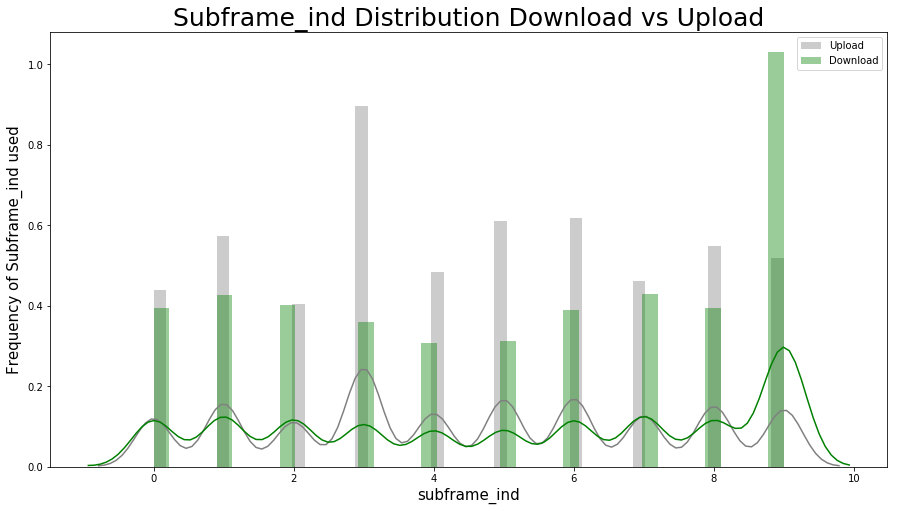

In [28]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'subframe_ind'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'subframe_ind'] , color='g', label='Download')
plt.title('Subframe_ind Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Subframe_ind used", fontsize = 15)
plt.xlabel("subframe_ind", fontsize = 15)
plt.legend()
plt.show()

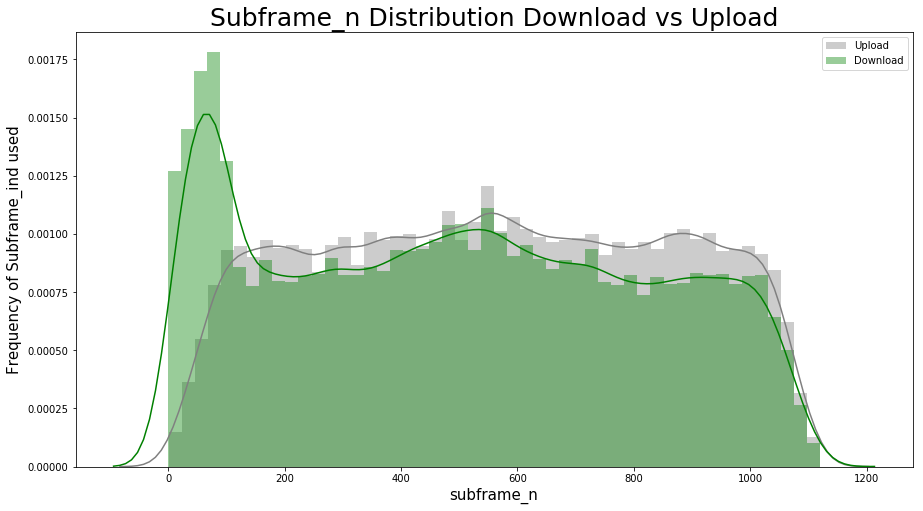

In [29]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'subframe_n'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'subframe_n'] , color='g', label='Download')
plt.title('Subframe_n Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Subframe_ind used", fontsize = 15)
plt.xlabel("subframe_n", fontsize = 15)
plt.legend()
plt.show()

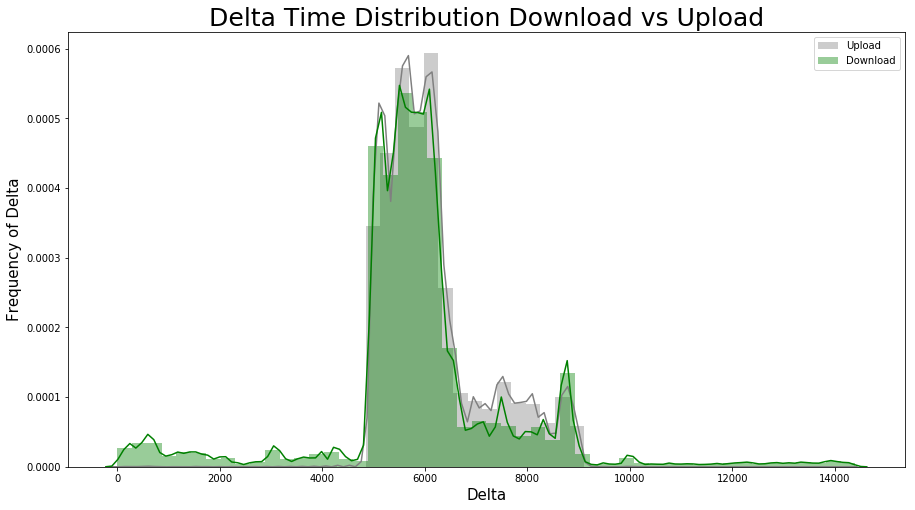

In [30]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'date_delta'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'date_delta'] , color='g', label='Download')
plt.title('Delta Time Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Delta", fontsize = 15)
plt.xlabel("Delta", fontsize = 15)
plt.legend()
plt.show()

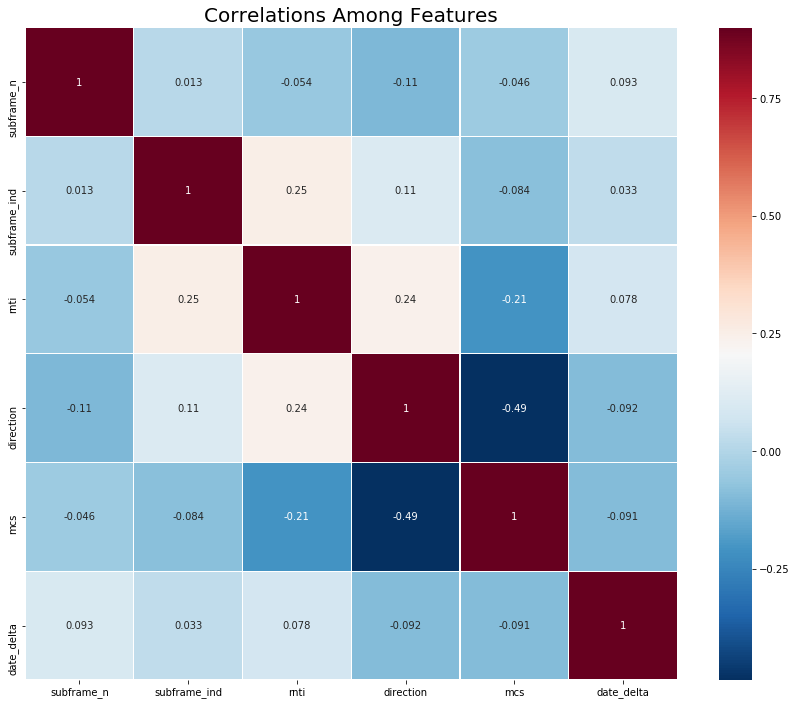

In [31]:
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

# Clustering

In [92]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
nclust = 10

In [130]:
y = df['mcs'].astype('int32')
x = df.loc[:, (df.columns != 'mcs')].astype('int32')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

#rs = RobustScaler()
#rs.fit(X_train)
#X_train = rs.transform(X_train)
#X_test = rs.transform(X_test)

In [132]:
km = KMeans(nclust)
km.fit(X_train)

kmeans = pd.DataFrame(km.predict(X_train))

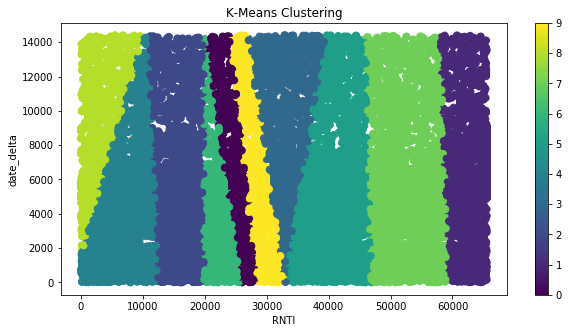

In [123]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['rnti'],X_train['date_delta'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('RNTI')
ax.set_ylabel('date_delta')
plt.colorbar(scatter)
plt.show()

In [133]:
gm = GaussianMixture(n_components=nclust,init_params='kmeans')
gm.fit(X_train)

gmm = pd.DataFrame(gm.predict(X_train))

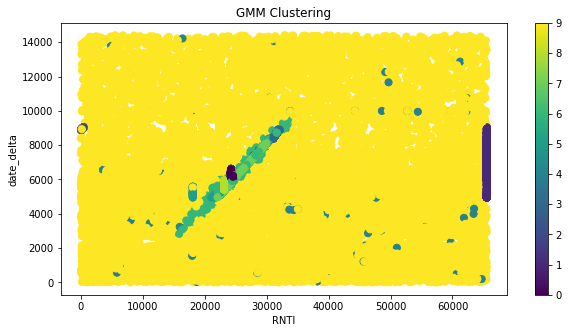

In [125]:
#Plotting the cluster obtained using GMM
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['rnti'],X_train['date_delta'],
                     c=gmm[0],s=50)
ax.set_title('GMM Clustering')
ax.set_xlabel('RNTI')
ax.set_ylabel('date_delta')
plt.colorbar(scatter)
plt.show()

In [134]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=5000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
label = ms.fit_predict(X_train)

mss = pd.DataFrame(label)

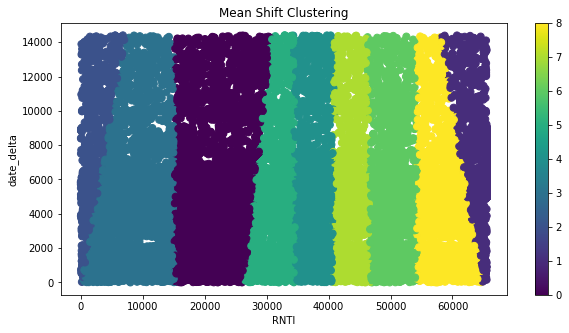

In [127]:
#Plotting the cluster obtained using GMM
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_train['rnti'],X_train['date_delta'],
                     c=mss[0],s=50)
ax.set_title('Mean Shift Clustering')
ax.set_xlabel('RNTI')
ax.set_ylabel('date_delta')
plt.colorbar(scatter)
plt.show()

In [135]:
X_train.insert((X_train.shape[1]),'kmeans',np.array(kmeans))
X_train.insert((X_train.shape[1]),'gmm',np.array(gmm))
X_train.insert((X_train.shape[1]),'mshift',np.array(mss))

kmeans = pd.DataFrame(km.predict(X_test))
gmm = pd.DataFrame(gm.predict(X_test))
mss = pd.DataFrame(ms.predict(X_test))
X_test.insert((X_test.shape[1]),'kmeans',np.array(kmeans))
X_test.insert((X_test.shape[1]),'gmm',np.array(gmm))
X_test.insert((X_test.shape[1]),'mshift',np.array(mss))

In [136]:
X_train.head()

,subframe_n,subframe_ind,rnti,direction,date_delta,kmeans,gmm,mshift
503588,941,4,29885,0,8082,2,3,5
397242,338,6,27017,1,6939,7,6,0
282816,380,6,24571,0,6110,4,5,0
306558,504,1,24571,1,6214,4,6,0
328653,606,9,24245,0,6317,4,5,0


# Regression

In [137]:
from sklearn import metrics


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import  GradientBoostingRegressor

from sklearn.linear_model import ElasticNet, Lasso
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from mlxtend.regressor import StackingRegressor

In [138]:
rf = RandomForestRegressor(n_estimators = 300, verbose = 1, n_jobs = -1, max_depth = 20)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   26.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.2s finished


Mean Absolute Error: 3.473415879936322
Mean Squared Error: 29.022438342502856
Root Mean Squared Error: 5.387247752099661


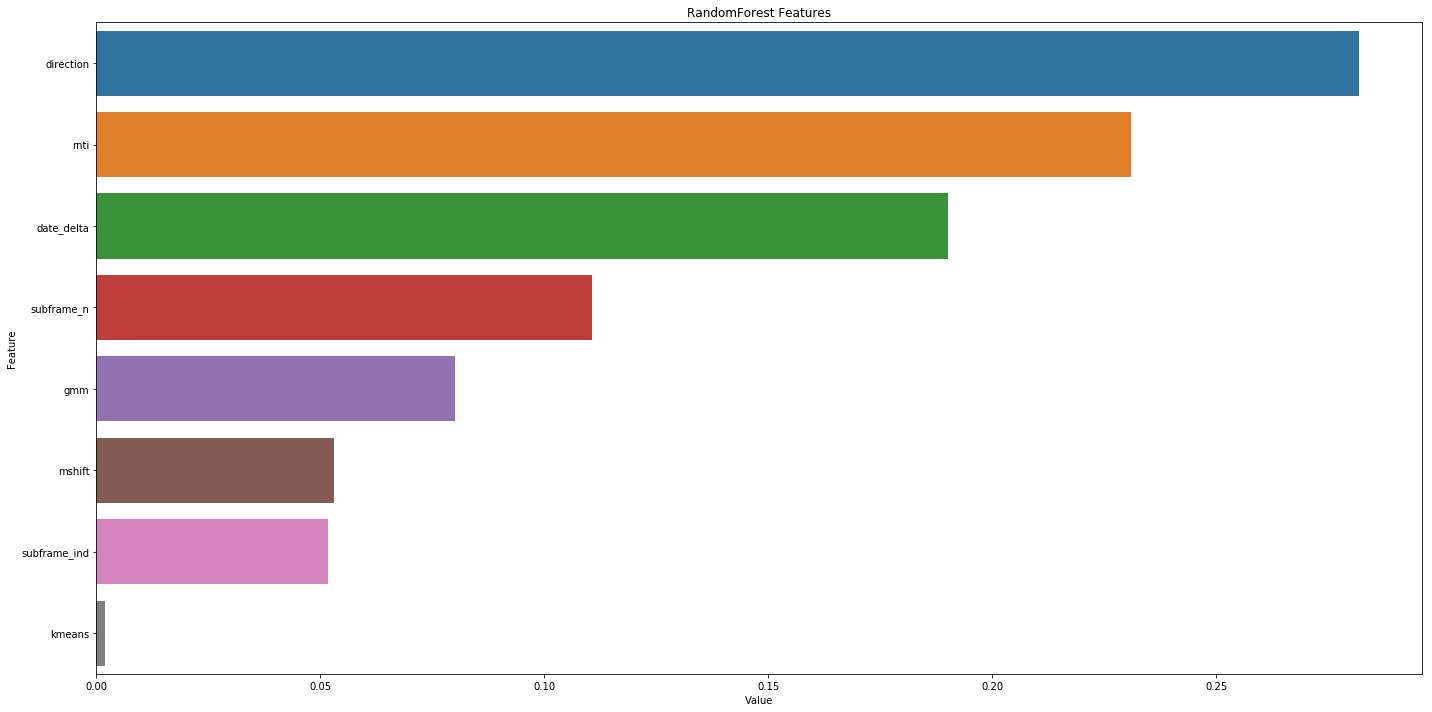

In [141]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RandomForest Features')
plt.tight_layout()
plt.show()

In [142]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 6.576937981468997
Mean Squared Error: 64.58597217740548
Root Mean Squared Error: 8.036539813713704


In [68]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=400,
                              learning_rate=0.1, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.9,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)
y_pred = model_lgb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


Mean Absolute Error: 3.998963903557427
Mean Squared Error: 36.171792149365835
Root Mean Squared Error: 6.0142989740588915


In [69]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,y_train)
y_pred = ENet.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 6.299493963076401
Mean Squared Error: 62.26368236066803
Root Mean Squared Error: 7.8907339557653335


In [70]:
GBoost = GradientBoostingRegressor(n_estimators=400, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5, verbose = 1)
GBoost.fit(X_train,y_train)
y_pred = GBoost.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.375277647760089
Mean Squared Error: 38.113814750649965
Root Mean Squared Error: 6.173638696153993


In [71]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

C:\Users\yurin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Mean Absolute Error: 4.717137033957901
Mean Squared Error: 40.28802369977579
Root Mean Squared Error: 6.347284750172769


In [72]:
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=42)
regr_2.fit(X_train,y_train)
y_pred = regr_2.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 5.9371127461376565
Mean Squared Error: 52.85404911856099
Root Mean Squared Error: 7.2700790311083265


In [73]:
rf_class = RandomForestRegressor(n_estimators = 300, n_jobs = -1, max_depth = 20)
stacked_averaged_models = StackingRegressor(regressors=[model_lgb, GBoost, model_xgb, ENet, rf, regr_2], meta_regressor=rf_class, use_features_in_secondary = True, store_train_meta_features = True, verbose = 3)


stacked_averaged_models.fit(X_train,y_train)
y_pred = stacked_averaged_models.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Fitting 6 regressors...
Fitting regressor1: lgbmregressor (1/6)
LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.9, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.1, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=1000, n_jobs=-1, num_leaves=400,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)
Fitting regressor2: gradientboostingregressor (2/6)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             

C:\Users\yurin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Fitting regressor4: pipeline (4/6)
Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False))])
Fitting regressor5: randomforestregressor (5/6)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.9s finished


Fitting regressor6: adaboostregressor (6/6)
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=42)


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    1.7s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    3.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.2s finished


Mean Absolute Error: 3.491552049376029
Mean Squared Error: 34.25036780938991
Root Mean Squared Error: 5.852381379352332


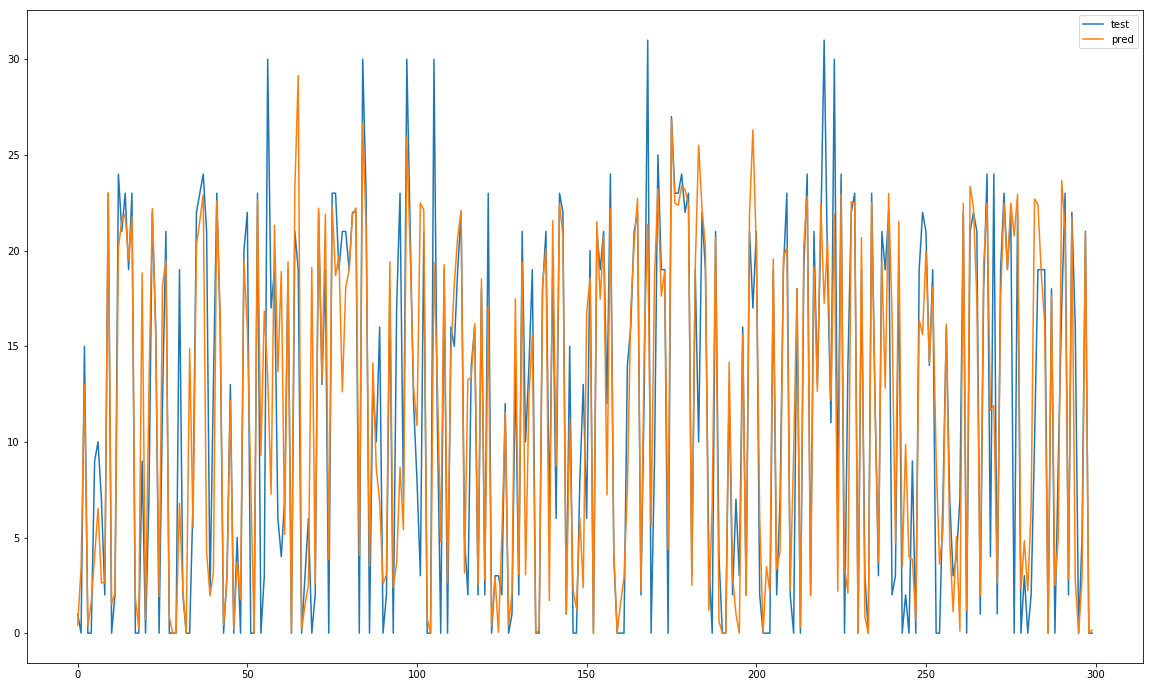

In [75]:
ind = list(range(300))
plt.subplots(figsize = (20,12))
plt.plot(np.array(y_test)[ind], label = 'test')
plt.plot(y_pred[ind], label = 'pred')
plt.legend()
plt.show()

# Classification

In [76]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [77]:
model = RandomForestClassifier(n_estimators=300, min_samples_leaf=10,random_state=1,verbose = 1, n_jobs = -1 )
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    1.1s finished


              precision    recall  f1-score   support

           0       0.97      0.61      0.75     10994
           1       0.08      0.34      0.13       152
           2       0.88      0.42      0.57      5170
           3       0.15      0.34      0.21       491
           4       0.13      0.21      0.16       369
           5       0.04      0.12      0.05       188
           6       0.01      0.08      0.02        85
           7       0.05      0.25      0.09       257
           8       0.03      0.13      0.05        76
           9       0.07      0.25      0.11       150
          10       0.04      0.15      0.07        73
          11       0.08      0.20      0.12       134
          12       0.09      0.26      0.14       239
          13       0.13      0.27      0.17       335
          14       0.20      0.36      0.26       494
          15       0.03      0.15      0.05       108
          16       0.08      0.22      0.12       179
          17       0.07    

In [78]:
clf = lgb.LGBMClassifier(class_weight='balanced',drop_rate=0.9, min_data_in_leaf=100, max_bin=255, verbose = 1,
                                 n_estimators=150,min_sum_hessian_in_leaf=1,importance_type='gain',learning_rate=0.1,bagging_fraction = 0.85,
                                 colsample_bytree = 1.0,feature_fraction = 0.1,lambda_l1 = 5.0,lambda_l2 = 3.0,max_depth =  9,
                                 min_child_samples = 55,min_child_weight = 5.0,min_split_gain = 0.1,num_leaves = 45,subsample = 0.75)  

clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20)
print(classification_report(clf.predict(X_test), y_test))

[1]	valid_0's multi_logloss: 3.44681
Training until validation scores don't improve for 20 rounds.
[2]	valid_0's multi_logloss: 3.42098
[3]	valid_0's multi_logloss: 3.39113
[4]	valid_0's multi_logloss: 3.3299
[5]	valid_0's multi_logloss: 3.31014
[6]	valid_0's multi_logloss: 3.2927
[7]	valid_0's multi_logloss: 3.26589
[8]	valid_0's multi_logloss: 3.24151
[9]	valid_0's multi_logloss: 3.21936
[10]	valid_0's multi_logloss: 3.19606
[11]	valid_0's multi_logloss: 3.17323
[12]	valid_0's multi_logloss: 3.14152
[13]	valid_0's multi_logloss: 3.11076
[14]	valid_0's multi_logloss: 3.09221
[15]	valid_0's multi_logloss: 3.07313
[16]	valid_0's multi_logloss: 3.05438
[17]	valid_0's multi_logloss: 3.03961
[18]	valid_0's multi_logloss: 3.02411
[19]	valid_0's multi_logloss: 3.00617
[20]	valid_0's multi_logloss: 2.99764
[21]	valid_0's multi_logloss: 2.98857
[22]	valid_0's multi_logloss: 2.98054
[23]	valid_0's multi_logloss: 2.96475
[24]	valid_0's multi_logloss: 2.95246
[25]	valid_0's multi_logloss: 2.94408

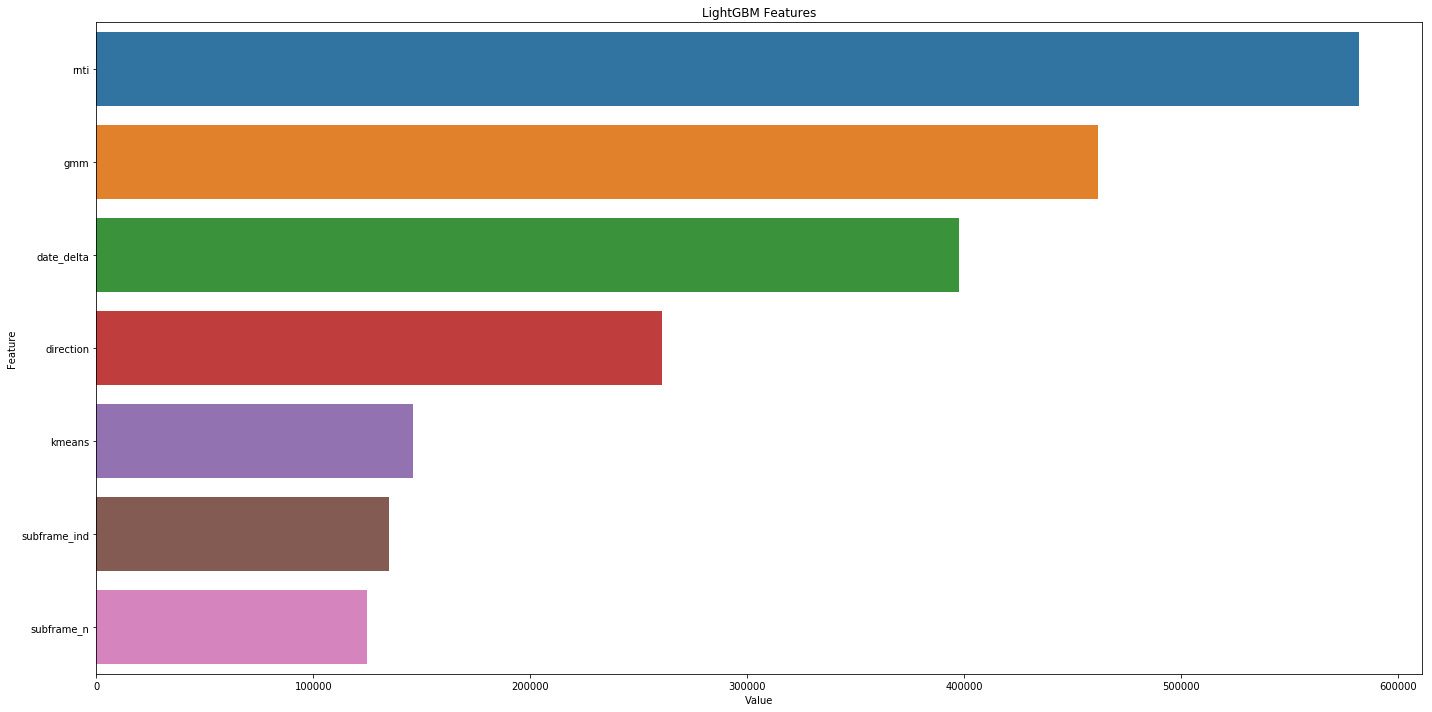

In [79]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')